<a href="https://colab.research.google.com/github/charlie024/Global-AQI-Analysis/blob/main/Global_AQI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Air Quality Index Analysis**

In [ ]:
!pip install openpyxl seaborn matplotlib

### **Importing pandas, seaborn and matplotlib**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Uploading .xlsx file (Global AQI Dataset)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Global_AQI_Analysis.ipynb to Global_AQI_Analysis (1).ipynb


### **Reading and Displaying the contents in the Excel File**

In [ ]:
df = pd.read_excel(list(uploaded.keys())[0])
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,latitude,longitude,country_code
0,Russian Federation,praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.74444,44.20306,RU
1,Brazil,presidente dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.29000,-44.49000,BR
2,Italy,priolo gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.15512,15.18248,IT
3,Poland,przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.01907,20.88029,PL
4,United States Of America,punta gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.92978,-82.04537,US


## **Global AQI Map: City-Level Air Quality Visualization**

In [ ]:
import plotly.express as px
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='AQI Value',
    size='AQI Value',
    hover_name='City',
    hover_data=['Country', 'AQI Category'],
    projection="natural earth",
    title="Global AQI by City"
)

fig.show()

## **Country-Level Choropleth Map: Average AQI Across Nations**

In [ ]:
import plotly.express as px
country_avg = df.groupby('Country')['AQI Value'].mean().reset_index()
fig = px.choropleth(
    country_avg,
    locations="Country",
    locationmode="country names",
    color="AQI Value",
    color_continuous_scale="OrRd",
    title="Average AQI by Country"
)
fig.show()

## **City-wise Distribution of AQI Categories (in %)**


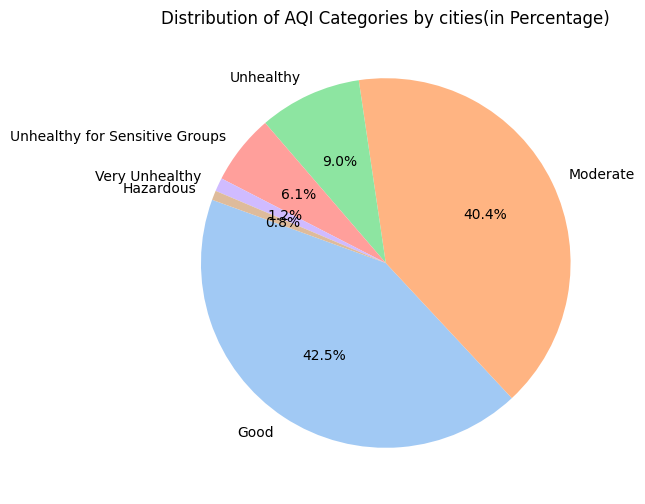

In [ ]:
category_counts = df['AQI Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('pastel'))
plt.title("Distribution of AQI Categories by cities(in %)")
plt.show()

## **Key Air Quality Metrics: Global City-Level Summary**

In [ ]:
print(f"Count of Cities: {df['City'].nunique()}")
print(f"Minimum AQI Value: {df['AQI Value'].min()}")
print(f"Avg CO AQI: {round(df['CO AQI Value'].mean(), 2)}")
print(f"Avg NO2 AQI: {round(df['NO2 AQI Value'].mean(), 2)}")
print(f"Avg Ozone AQI: {round(df['Ozone AQI Value'].mean(), 2)}")
print(f"Avg PM2.5 AQI: {round(df['PM2.5 AQI Value'].mean(), 2)}")

Count of Cities: 19466
Minimum AQI Value: 7
Avg CO AQI: 1.37
Avg NO2 AQI: 3.42
Avg Ozone AQI: 34.46
Avg PM2.5 AQI: 67.77


## **Filter: Top 10 Most Polluted Countries by Average AQI**

In [ ]:
top_countries = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10).index.tolist()
filtered_df = df[df['Country'].isin(top_countries)]

## **Interactive Bar Chart: View Top or Bottom N Countries by Average AQI**

In [ ]:
from ipywidgets import interact

@interact(view=['top', 'bottom'], N=(5, 30))
def show_chart(view='top', N=10):
    avg_by_country = df.groupby("Country")['AQI Value'].mean().sort_values(ascending=(view == "bottom"))
    selected = avg_by_country.head(N)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=selected.values, y=selected.index)
    plt.title(f"{view.capitalize()} {N} Countries by Average AQI")
    plt.xlabel("Average AQI")
    plt.ylabel("Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='view', options=('top', 'bottom'), value='top'), IntSlider(value=10…

## **Interactive AQI Map: Selected Countries – City-Level Visualization**
**NOTE:**  *countries_of_interest dataframe can contain altered to view other countries. By doing so the visualization that follow will change according to the altered countries_of_interest.*

In [ ]:
countries_of_interest = ["United States Of America", "India", "China"]
if len(countries_of_interest) == 1:
    title = f"AQI by City - {countries_of_interest[0]}"
else:
    title = f"AQI by City - {', '.join(countries_of_interest)}"
filtered_df = df[df['Country'].isin(countries_of_interest)]
import plotly.express as px
fig = px.scatter_geo(
    filtered_df,
    lat='latitude',
    lon='longitude',
    color='AQI Value',
    size='AQI Value',
    hover_name='City',
    hover_data=['Country', 'AQI Category'],
    projection="natural earth",
    title=title
)

fig.show()

## **Choropleth Map: Average AQI by Country (With Total Number of Cities Included)**

In [ ]:
import plotly.express as px
country_avg = filtered_df.groupby('Country')['AQI Value'].mean().reset_index()
country_avg["AQI Value"] = country_avg["AQI Value"].round(2)
count_of_cities = {filtered_df['City'].nunique()}
fig = px.choropleth(
    country_avg,
    locations="Country",
    locationmode="country names",
    color="AQI Value",
    color_continuous_scale="OrRd",
    title="Average AQI by Country" + " - Total Number of Cities " + str(count_of_cities),
    labels={"AQI Value": "Average AQI"}
)
fig.show()

## **Stacked Bar Chart: Country-Wise Average AQI by Pollutant Type**

In [ ]:
import plotly.graph_objects as go
pollutants_avg = filtered_df.groupby('Country')[['CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']].mean()

# Add bars for each pollutant
pollutants_columns = {
    "CO AQI": "CO AQI Value",
    "NO2 AQI": "NO2 AQI Value",
    "Ozone AQI": "Ozone AQI Value",
    "PM2.5 AQI": "PM2.5 AQI Value"
}

# compute averages for the columns
pollutants_avg = filtered_df.groupby("Country")[list(pollutants_columns.values())].mean()

# Generate interactive stacked bar chart with corrected keys
fig = go.Figure()

for name, col in pollutants_columns.items():
    fig.add_trace(go.Bar(
        y=pollutants_avg.index,
        x=pollutants_avg[col],
        name=name,
        orientation='h',
        hovertemplate='%{x:.2f} AQI'
    ))

fig.update_layout(
    barmode='stack',
    title='Stacked Average AQI by Country',
    xaxis_title='Average AQI',
    yaxis_title='Country',
    legend_title='Pollutant Type',
    height=600
)

## **Pie Chart: Proportion of Cities of Filtered countries in Each AQI Category**

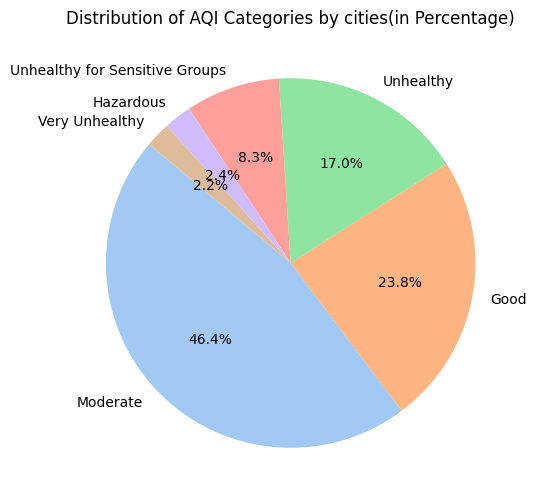

In [ ]:
category_counts = filtered_df['AQI Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of AQI Categories by cities(in Percentage)")
plt.show()